**References**

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb

## Basic Setup

In [28]:
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('here')

# shows the image immediately. Resize option available
def show_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  cv2_imshow(img)

# turns the path into an image object. Resize option available
def get_img(path, resize=None):
  img = cv2.imread(path)
  if (resize != None):
    img = cv2.resize(img, dsize=(0,0), fx=resize, fy=resize)
  return img

def cite_source(img, source, org=None, scale=None):
    if (org == None):
        img = cv2.putText(img, source, org=(int(np.ceil(img.shape[1]*0.1)), int(np.ceil(img.shape[0]*0.98))),
                          fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=1)
    elif (org != None):
        img = cv2.putText(img, source, org=org,
                          fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=scale, color=1)
    return img

# Code by Bill Grates on Stackoverflow
# https://stackoverflow.com/users/5629538/bill-grates
# https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


# 2.1 Discrete and Continuous Variables
- Variable whose value is determined by a process that has uncertainty.

<br/>

Two varieties of variable
1. Discrete:  
  - Countable number of states (can be finite or infinite)
  - Category ("heads", "tails)
  - Integers (result of rolling a die)
2. Continuous:
  - Real value (represented by float in computing)
  - Height, speed, temperature


# 2.2 Probability Mass Functions
Describes likelihood of randome variable taking on its possible values.

<br/>

PMF: function that describes probability distribution of discrete random variable.  
- $P(x)$, $P(y)$.  
- Probability of a particular states  
  - $P(x)$ or $P(x=x)$ or $x ~ P(x)$  
    - Probability of specific outcome $x$  
- 3 essential properties of $P(x):  
  
  - every possible value of $x$ within domain  

  - Each $P(x)$ can only range from 0 ~ 1.  

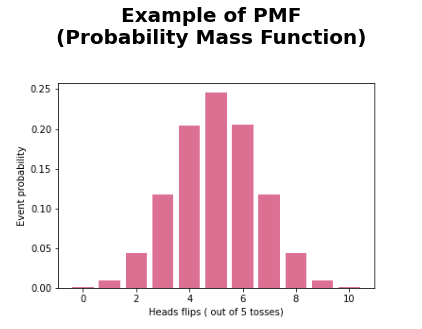

In [14]:
path = "/content/here/MyDrive/Math works/cointoss_prop.png"
img = get_img(path)
plt.figure(figsize=(12,5))
plt.title("Example of PMF\n(Probability Mass Function)", fontsize=20, fontweight='bold')
plt.axis('off')
plt.imshow(img)

# 2.3 Probability Density Functions

PMF analogue for continuous random variable

<br/>

PMF: function that describes probability distribution of discrete random variable.  
- *$p(x)$, $p(y)$*
- Probability of a particular states  
- 3 essential properties of $P(x)$:  
  - every possible value of $x$ within domain  
  - Every *$p(x)$* must be $\geq$ 0
  - $\int p(x) \delta x = 1$
- Probability that $x$ is between points $a$ and $b$:
  - $\int_{[a, b]}p(x)\delta x = \int^bp(x)\delta x - \int^ap(x)\delta x$

# 2.4 Exercises on Probability Functions
Which one describes better - PMF or PDF for each of the examples below?
1. Residential property values: PDF
2. Likelyhood of each NFL team winning the SuperBowl: 
  - P **Mass** F (fitting a specific category): winning or losing
3. Duration of commute from Greenwich CT to midtown Manhattan?: PDF

# 2.5 Expected Value
Long-term average of some RV $x$
- If $x$ is discrete: 
$$E = \sum_x x\cdot P(x)$$

- If $x$ is continuous:
$$E =\int x \cdot p(x)\cdot \delta x$$

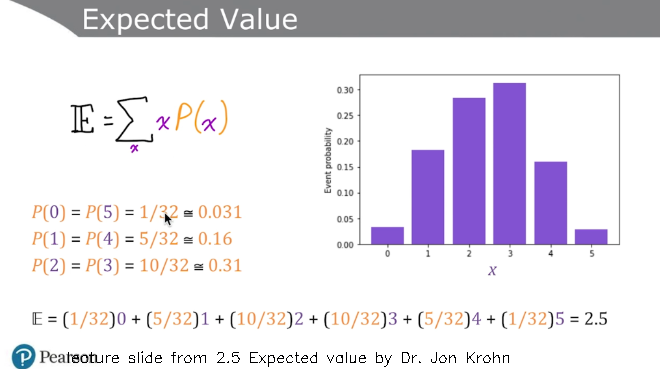

In [25]:
path = "/content/here/MyDrive/Math works/PMF expected value.png"
img = get_img(path, resize=0.65)
img = cite_source(img, "lecture slide from 2.5 Expected value by Dr. Jon Krohn", scale=0.5)
cv2_imshow(img)

In [30]:
def factorial(k):
    return math.factorial(k)

def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [31]:
E = sum([P[x]*x for x in range(6)])
E

2.5

# 2.6 Exercises on Expected Value
## Problem 1.
Assuming heads = 1 and tails = 0, what’s the expected value of the toss of a fair coin?

In [34]:
n_experiments = 10000
prob = np.random.binomial(1, 0.5, n_experiments)
sum(prob)/n_experiments

0.4933

Answer:
$$\frac{1}{2} \cdot 0 + \frac{1}{2} \cdot 1 = \frac{1}{2}$$ 

## Problem 2.
...and of two tosses of a fair coin?


In [35]:
prob = np.random.binomial(2, 0.5, n_experiments)
sum(prob)/n_experiments

0.9901

Answer:
$$\frac{1}{4} \cdot 0 + \frac{1}{2} \cdot 1 + \frac{1}{4} \cdot 2= 1$$ 

- Probability of getting 0 is 1 in 4;
- that of getting 1 is 1 in 2;
- that of getting 2 is 1 in 4;

## Problem 3. 
You are one of a thousand people to purchase a lottery ticket. The ticket costs \$10 and pays out \\$5000. What value should you expect from this transaction?

In [38]:
prob = 1/1000
ticket = 10
payout = 5000

prob * 4990 + (1-prob) * -10 

-5.0

Answer: 
- probability of winning the payout will give \$4,990 (subtracting the ticket purchase cost).
- One the other hand, the probability of losing the ticket price is $\frac{999}{1000}$.
  - Thus $\frac{999}{1000} \cdot \$ -10$
- So we can expect to lose \$5 for buying the ticket.

# Frequent Functions
- ```np.random.binomial(events, probabiltiy, trials)```